In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

**Phần 1 viết các hàm liên quan**

In [ ]:
def TimNguong(image):
  vector=[]
  for i in np.arange(0,image.shape[1]):
    ok= np.max(image[:,i])
    vector.append(ok)
  return np.min(vector)

In [ ]:
def TichChap(img,kernel): 
  m,n= img.shape

  zero = np.zeros((m+2,n+2))
  out= np.zeros((m+2,n+2))
  zero[1:(m+1),1:(n+1)]= img
  for i in np.arange(1,m+1):
    for j in np.arange(1,n+1):
      out[i,j]= np.sum(zero[i-1:i+2,j-1:j+2]* kernel)

  return out[1:m+1,1:n+1]

In [ ]:
def sobel(image,Hx,Hy,Thre): #cai nay chi phu hop cho kernel 3*3 
  I1 = copy.deepcopy(image)
  I2 = copy.deepcopy(image)
  
  I1 = TichChap(I1,Hx)
  I2 = TichChap(I2,Hy)

  I3 = np.absolute(I1)+ np.absolute(I2)

  I4 = copy.deepcopy(I3)  
  
  I3[I4<Thre]=0
  I3[I4>=Thre]=1

  return I3

In [ ]:
def Laplace(image,H):
  m,n= image.shape
  #b1 tinh tich chap
  I1 = TichChap(image,H)
  #b2 phan cuc
  I2 = copy.deepcopy(I1)
  I1[I2<=0]=1
  I1[I2>0]=0
  #b3 tim bien
  I3= copy.deepcopy(I1)
  for i in np.arange(0,m):
    for j in np.arange(0,n):
      if i==0 or i== m-1:
        if j==0 or j == n-1:
            I1[i,j]=0
        else:
          if I3[i,j-1]!=I3[i,j+1]:
            I1[i,j]=1
          else:
            I1[i,j]=0

      elif j==0 or j== n-1:
        if I3[i-1,j]!= I3[i+1,j]:
          I1[i,j]=1
        else:
          I1[i,j]=0

      else:
        if (I3[i-1,j]!=I3[i+1,j]) or (I3[i,j-1]!=I3[i,j+1]):
          I1[i,j]=1
        else:
          I1[i,j]=0
  
  return I1

In [ ]:
def sobel1(image,Hx,Hy):
  Thre = TimNguong(image)

  I1 = copy.deepcopy(image)
  I2 = copy.deepcopy(image)
  
  I1 = TichChap(I1,Hx)
  I2 = TichChap(I2,Hy)

  I3 = np.absolute(I1)+ np.absolute(I2)

  I4 = copy.deepcopy(I3)  
  
  I3[I4<Thre]=0
  I3[I4>=Thre]=1

  return I3

**Phần 2 Nhập các dữ kiện đề bài**

In [ ]:
S = np.array(
    [
     [9,9,9,9,9,8,8,8],
     [9,9,8,8,8,8,8,1],
     [9,9,9,8,8,8,1,1],
     [7,7,8,8,8,2,1,1],
     [7,7,8,8,2,1,1,1],
     [7,7,2,2,2,1,1,1],
     [7,2,2,1,1,1,1,1],
     [7,1,1,1,1,1,1,1]
    ]
)

Hx= np.array(
    [
      [-1,0,1],
      [-1,0,1],
      [-1,0,1],
    ]
)

Hy = np.array(
    [
      [-1,-1,-1],
      [0,0,0],
      [1,1,1]
    ]
)
H1 = np.array(
    [
     [0,-1,0],
     [-1,4,-1],
      [0,-1,0]
    ]
)
Hx1 = np.array(
    [
     [-1,0,1],
     [-2,0,2],
     [-1,0,1]
    ]
)
Hy1 = np.array(
    [
     [-1,-2,1],
     [0,0,0],
     [1,2,1]
    ]
)

**Phần 3 Bài làm**

**Bài Prewitt**

*Bài này mình gọi hàm sobel bởi vì cài đặt 2 thuật toán sobel và prewitt giống nhau*


In [ ]:
TichChap(S,Hx)

array([[ 18.,  -1.,  -1.,   0.,  -1.,  -1.,  -7., -16.],
       [ 27.,  -1.,  -2.,  -1.,  -1.,  -8., -14., -17.],
       [ 25.,   0.,  -1.,  -1.,  -6., -14., -15., -10.],
       [ 23.,   2.,   1.,  -7., -13., -15.,  -8.,  -3.],
       [ 21.,  -3.,  -3.,  -6., -14.,  -9.,  -1.,  -3.],
       [ 16.,  -9.,  -5.,  -7.,  -8.,  -2.,   0.,  -3.],
       [ 10., -16.,  -6.,  -1.,  -1.,  -1.,   0.,  -3.],
       [  3., -11.,  -1.,  -1.,   0.,   0.,   0.,  -2.]])

In [ ]:
TichChap(S,Hy)

array([[ 18.,  26.,  25.,  24.,  24.,  24.,  17.,   9.],
       [  0.,   0.,  -1.,  -2.,  -2.,  -8., -14., -14.],
       [ -4.,  -4.,  -2.,   0.,  -6., -13., -13.,  -7.],
       [ -4.,  -5.,  -3.,  -7., -13., -13.,  -7.,   0.],
       [  0.,  -6., -12., -18., -13.,  -7.,  -1.,   0.],
       [ -5., -11., -18., -14.,  -8.,  -1.,   0.,   0.],
       [ -6.,  -7.,  -8.,  -3.,  -2.,  -1.,   0.,   0.],
       [ -9., -11.,  -5.,  -4.,  -3.,  -3.,  -3.,  -2.]])

In [ ]:
np.absolute(TichChap(S,Hx))+np.absolute(TichChap(S,Hy))

array([[36., 27., 26., 24., 25., 25., 24., 25.],
       [27.,  1.,  3.,  3.,  3., 16., 28., 31.],
       [29.,  4.,  3.,  1., 12., 27., 28., 17.],
       [27.,  7.,  4., 14., 26., 28., 15.,  3.],
       [21.,  9., 15., 24., 27., 16.,  2.,  3.],
       [21., 20., 23., 21., 16.,  3.,  0.,  3.],
       [16., 23., 14.,  4.,  3.,  2.,  0.,  3.],
       [12., 22.,  6.,  5.,  3.,  3.,  3.,  4.]])

In [ ]:
thetha = TimNguong(S)
thetha

8

In [ ]:
sobel(S,Hx,Hy,thetha)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.]])

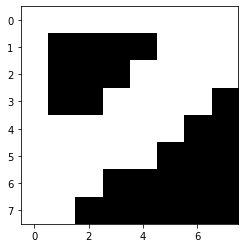

In [ ]:
plt.imshow(sobel(S,Hx,Hy,thetha),cmap="gray")
plt.show()

**Bài Sobel**

In [ ]:
TichChap(S,Hx1)

array([[ 27.,  -1.,  -1.,   0.,  -2.,  -2.,  -7., -24.],
       [ 36.,  -2.,  -3.,  -1.,  -1.,  -8., -21., -25.],
       [ 34.,   0.,  -2.,  -2.,  -6., -21., -22., -11.],
       [ 30.,   3.,   2.,  -7., -19., -22.,  -9.,  -4.],
       [ 28.,  -2.,  -2., -12., -21., -10.,  -1.,  -4.],
       [ 23., -14., -10.,  -7.,  -9.,  -3.,   0.,  -4.],
       [ 12., -21.,  -7.,  -2.,  -1.,  -1.,   0.,  -4.],
       [  4., -17.,  -1.,  -1.,   0.,   0.,   0.,  -3.]])

In [ ]:
TichChap(S,Hy1)

array([[ 27.,  35.,  33.,  32.,  32.,  32.,  25.,  10.],
       [ 18.,  18.,  17.,  15.,  13.,   8.,  -5., -21.],
       [ 12.,  10.,  14.,  16.,  10.,  -3., -18.,  -7.],
       [ 12.,  11.,  12.,   9.,  -3., -18.,  -5.,   0.],
       [ 14.,  10.,  -2.,  -8., -15.,  -6.,   1.,   0.],
       [  9.,   0.,  -8., -17.,  -7.,   1.,   2.,   0.],
       [  8.,  -9.,  -5.,   0.,  -1.,   1.,   2.,   0.],
       [-12.,  -9.,  -5.,  -3.,  -2.,  -2.,  -2.,  -3.]])

In [ ]:
np.absolute(TichChap(S,Hx1))+np.absolute(TichChap(S,Hy1))

array([[54., 36., 34., 32., 34., 34., 32., 34.],
       [54., 20., 20., 16., 14., 16., 26., 46.],
       [46., 10., 16., 18., 16., 24., 40., 18.],
       [42., 14., 14., 16., 22., 40., 14.,  4.],
       [42., 12.,  4., 20., 36., 16.,  2.,  4.],
       [32., 14., 18., 24., 16.,  4.,  2.,  4.],
       [20., 30., 12.,  2.,  2.,  2.,  2.,  4.],
       [16., 26.,  6.,  4.,  2.,  2.,  2.,  6.]])

In [ ]:
sobel(S,Hx1,Hy1,thetha)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.]])

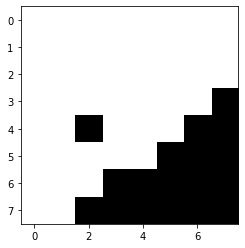

In [ ]:
plt.imshow(sobel(S,Hx1,Hy1,thetha),cmap="gray")
plt.show()

**So sánh prewitt và sobel**

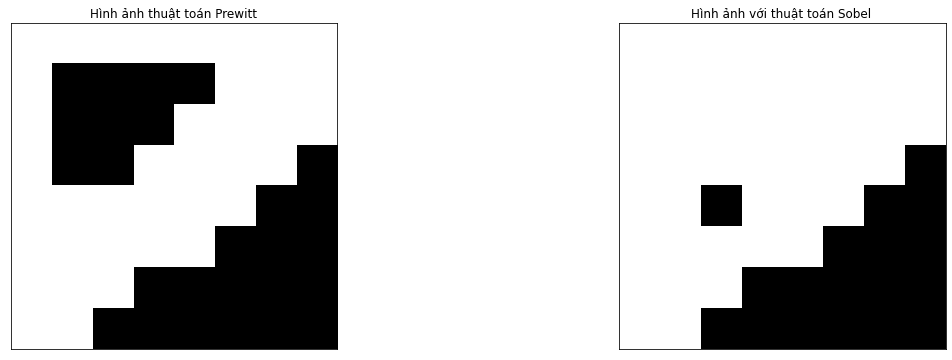

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121) , plt.imshow(sobel(S,Hx,Hy,thetha),cmap="gray"), plt.title("Hình ảnh thuật toán Prewitt")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(sobel(S,Hx1,Hy1,thetha),cmap="gray"), plt.title("Hình ảnh với thuật toán Sobel ")
plt.xticks([]), plt.yticks([])
plt.show()

**Bài Laplace**

In [ ]:
TichChap(S,H1)

array([[ 18.,   9.,  10.,  10.,  11.,   7.,   8.,  23.],
       [  9.,   1.,  -3.,  -1.,  -1.,   0.,  14., -13.],
       [ 11.,   2.,   3.,  -1.,   0.,  13., -14.,   1.],
       [  5.,  -3.,   0.,   0.,  12., -10.,  -1.,   1.],
       [  7.,  -1.,   7.,  12., -11.,  -2.,   0.,   1.],
       [  7.,  10., -11.,  -5.,   2.,  -1.,   0.,   1.],
       [ 12.,  -9.,   2.,  -2.,  -1.,   0.,   0.,   1.],
       [ 20.,  -6.,   0.,   1.,   1.,   1.,   1.,   2.]])

In [ ]:
Laplace(S,H1)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.]])

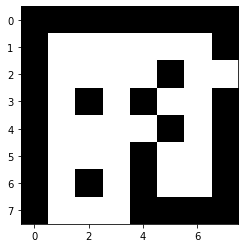

In [ ]:
plt.imshow(Laplace(S,H1),cmap="gray")
plt.show()